Number of tweets extracted: 200.

5 recent tweets:

When a country Taxes our products coming in at, say, 50%, and we Tax the same product coming into our country at ZE… https://t.co/UFVLaWepzN

We must protect our country and our workers. Our steel industry is in bad shape. IF YOU DON’T HAVE STEEL, YOU DON’T HAVE A COUNTRY!

Eric, we are all with you and your family! Look forward to seeing you back on T.V. https://t.co/d6y3Q00BSy

Alec Baldwin, whose dying mediocre career was saved by his terrible impersonation of me on SNL, now says playing me… https://t.co/Ntuy4BRXmJ

When a country (USA) is losing many billions of dollars on trade with virtually every country it does business with… https://t.co/lPSkkolNRP

0     2018-03-02 13:57:22
1     2018-03-02 13:01:58
2     2018-03-02 11:18:28
3     2018-03-02 11:07:40
4     2018-03-02 10:50:34
5     2018-03-02 03:04:51
6     2018-03-02 02:59:37
7     2018-03-02 02:58:35
8     2018-03-02 00:52:43
9     2018-03-02 00:51:28
10    2018-03-01 21:3

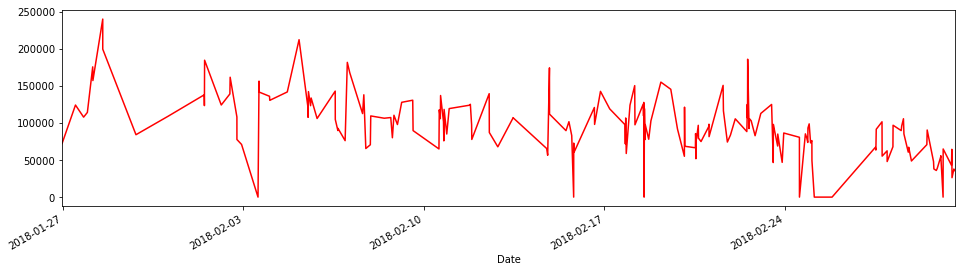

In [7]:
import tweepy
from tweepy import OAuthHandler
import sys
import json
import pandas as pd
import operator
import os
import matplotlib.pyplot as plt
import numpy as np
import config
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

"""
Using the tutorial, testing to see the format of the twitter data,as mine seems to be duplicated and weird.
"""

def twitter_setup():
    """Initiate API"""
    auth = OAuthHandler(config.consumer_key, config.consumer_secret)
    auth.set_access_token(config.access_token, config.access_secret)

    api = tweepy.API(auth)
    return(api)

extractor = twitter_setup()
# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
        print(tweet.text)
        print()

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
print(data['Date'])

tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

tfav.plot(figsize=(16,4), color='r')
